# Exploratory Analytics

##### Introduction

> Introduction to the dataset

###### AI-ML_Salaries
###### A Data Science portfolio project: Data Science job salaries from 2020 to 2022

###### About Dataset
The salaries are from [ai-jobs](https://salaries.ai-jobs.net/download/). Ai-jobs collects salary information anonymously from professionals all over the world in the AI/ML and Big Data space and makes it publicly available for anyone to use, share and play around with. The data is being updated regularly with new data coming in, usually on a weekly basis.
The primary goal is to have data that can provide better guidance in regards to what's being paid globally. So newbies, experienced pros, hiring managers, recruiters and also startup founders or people wanting to make a career switch can make better informed decisions.

The dataset contains one table structured as follow:
- **work_year**: The year the salary was paid.
- **experience_level**: The experience level in the job during the year with the following possible values:
    - **EN**: Entry-level / Junior
    - **MI**: Mid-level / Intermediate
    - **SE**: Senior-level / Expert
    - **EX**: Executive-level / Director
- **employment_type**: The type of employement for the role:
    - **PT**: Part-time
    - **FT**: Full-time
    - **CT**: Contract
    - **FL**: Freelance
- **job_title**: The role worked in during the year.
- **salary**: The total gross salary amount paid.
- **salary_currency**: The currency of the salary paid as an ISO 4217 currency code.
- **salaryinusd**: The salary in USD (FX rate divided by avg. USD rate for the respective year via fxdata.foorilla.com).
- **employee_residence**: Employee's primary country of residence in during the work year as an ISO 3166 country code.
- **remote_ratio**: The overall amount of work done remotely, possible values are as follows:
    - **0**: No remote work (less than 20%)
    - **50**: Partially remote
    - **100**: Fully remote (more than 80%)
- **company_location**: The country of the employer's main office or contracting branch as an ISO 3166 country code.
- **company_size**: The average number of people that worked for the company during the year:
    - **S**: less than 50 employees (small)
    - **M**: 50 to 250 employees (medium)
    - **L**: more than 250 employees (large)

##### Preliminary Wrangling

In [79]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.api.types import CategoricalDtype
import seaborn as sns
%matplotlib inline

> - Loading in dataset with pandas
> - Describing the dataset
> - Printing out some parts of the table

In [80]:
# importing or loading in the dataset using pandas, here I am using a copy of salaries.csv (salaries_usable.csv)
salaries_df = pd.read_csv('salaries_usable.csv')

# shape of the dataset
Shape = salaries_df.shape
columns = salaries_df.shape[1]
rows = salaries_df.shape[0]

print("This dataset contains {} rows and {} columns, hence {}".format(rows, columns, Shape))

# print out some part of dataset

# Head
print(salaries_df.head(5))

# 10 random samples
print(salaries_df.sample(n = 10))

# Tail
print(salaries_df.tail())

This dataset contains 1332 rows and 11 columns, hence (1332, 11)
   work_year experience_level employment_type                  job_title  \
0       2022               MI              FT  Machine Learning Engineer   
1       2022               MI              FT  Machine Learning Engineer   
2       2022               MI              FT             Data Scientist   
3       2022               MI              FT             Data Scientist   
4       2022               MI              FT             Data Scientist   

   salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0  130000             USD         130000                 US             0   
1   90000             USD          90000                 US             0   
2  120000             USD         120000                 US           100   
3  100000             USD         100000                 US           100   
4   85000             USD          85000                 US           100   

  company_locat

##### **What is the structure of the dataset?**

The dataset contains salaries of 1332 employees for jobs related to data from 2020 to 2022. A total of 11 variables are used to record salaries. The majority of variables are qualitative with both ordered and unordered factor variables.

##### **What is/are the main feature(s) of interest in your dataset?**

This data is primarily intended to help provide better guidance on what's being paid globally. The objective of this study is to determine the factors that contribute to higher salaries and salary trends over time.

##### **What features in the dataset do you think will help support your investigation into your feature(s) of interest?**

We believe that employee experience has the greatest influence on salary. Salary is also affected by job title_name, job type, year of employment, and company size, but to a lesser extent. Since we are not certain, we will test the correlation between salaries and the other variables (employee residence and company location).

##### Assesssment and Cleaning of the dataset

We believe that employee experience has the greatest influence on salary. Salary is also affected by job title_name, job type, year of employment, and company size, but to a lesser extent. Since we are not certain, we will test the correlation between salaries and the other variables (employee residence and company location).

###### **Assessment**

In [81]:
# Info
print(salaries_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1332 entries, 0 to 1331
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           1332 non-null   int64 
 1   experience_level    1332 non-null   object
 2   employment_type     1332 non-null   object
 3   job_title           1332 non-null   object
 4   salary              1332 non-null   int64 
 5   salary_currency     1332 non-null   object
 6   salary_in_usd       1332 non-null   int64 
 7   employee_residence  1332 non-null   object
 8   remote_ratio        1332 non-null   int64 
 9   company_location    1332 non-null   object
 10  company_size        1332 non-null   object
dtypes: int64(4), object(7)
memory usage: 114.6+ KB
None


> In our table, there is no null value, and the columns' names do not contain spaces. Despite being able to work with the data types as they are, we will make some modifications: change experience level, company size, and remote ratio to ordered categories, and employment type to unordered categories.

**Visual Assessment of the dataset in a spreadsheet application shows some of the job title_names were recorded differently and should be the same** 

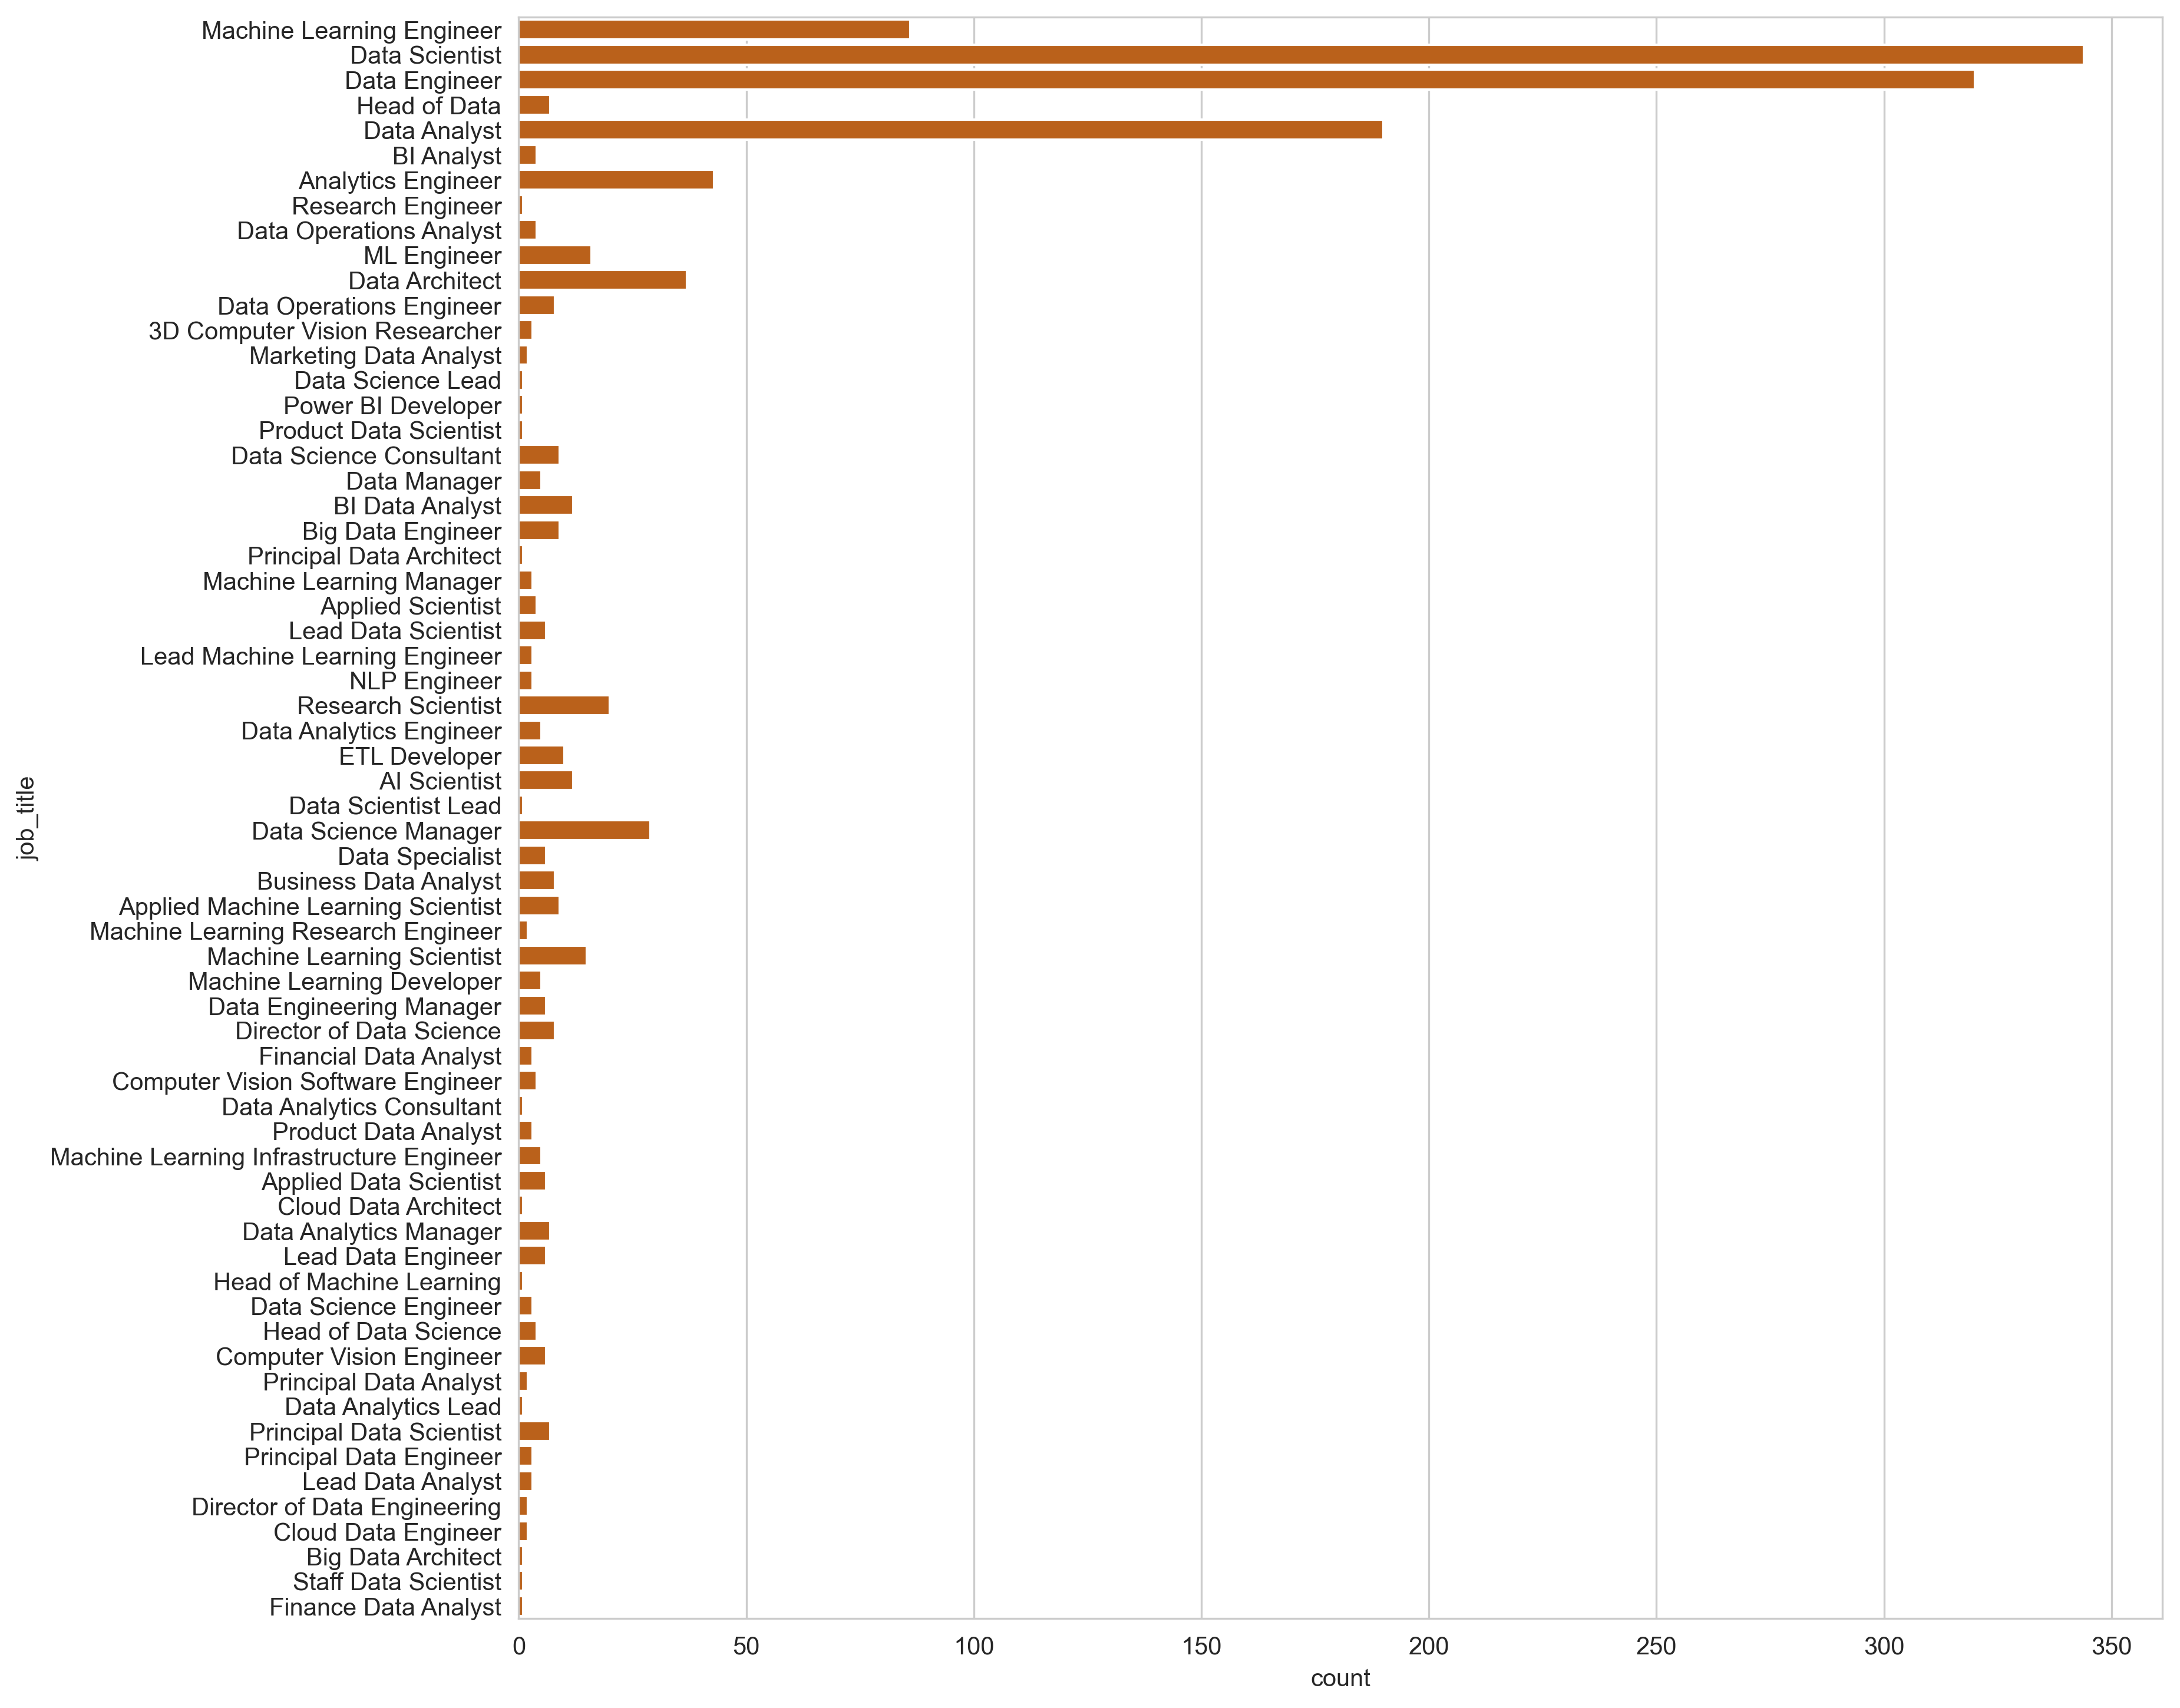

In [82]:
#Displaying the various job title_name entries 
sns.set_style('whitegrid')
plt.figure(figsize=[12,12], dpi=300)
default_color = sns.color_palette()[2]
sns.countplot(color=default_color, y=salaries_df['job_title']) # sns.countplot(data = salaries_df, y = 'job_title')
plt.show()

> Majority of Machine Learning Engineers were recorded as 'Machine Learning Engineers'.

However some entries were also recorded as 'ML Engineer' , 'Applied Machine Learning Scientist', 'Machine Learning Scientist', 'Machine Learning Developer', 'Machine Learning Infrastructure Engineer' etc The same goes for data scientist, data analyst and data engineer entries and other job_titles did the same.

In [83]:
# Displaying how many unique values contained in salaries_df['job_title']
print(salaries_df['job_title'].unique())
print(salaries_df['job_title'].nunique())

['Machine Learning Engineer' 'Data Scientist' 'Data Engineer'
 'Head of Data' 'Data Analyst' 'BI Analyst' 'Analytics Engineer'
 'Research Engineer' 'Data Operations Analyst' 'ML Engineer'
 'Data Architect' 'Data Operations Engineer'
 '3D Computer Vision Researcher' 'Marketing Data Analyst'
 'Data Science Lead' 'Power BI Developer' 'Product Data Scientist'
 'Data Science Consultant' 'Data Manager' 'BI Data Analyst'
 'Big Data Engineer' 'Principal Data Architect' 'Machine Learning Manager'
 'Applied Scientist' 'Lead Data Scientist'
 'Lead Machine Learning Engineer' 'NLP Engineer' 'Research Scientist'
 'Data Analytics Engineer' 'ETL Developer' 'AI Scientist'
 'Data Scientist Lead' 'Data Science Manager' 'Data Specialist'
 'Business Data Analyst' 'Applied Machine Learning Scientist'
 'Machine Learning Research Engineer' 'Machine Learning Scientist'
 'Machine Learning Developer' 'Data Engineering Manager'
 'Director of Data Science' 'Financial Data Analyst'
 'Computer Vision Software Engine

> This shows we have 64 unique values ad we are looking to reduce them as some of them are redundant

In [84]:
#displaying the Entries with 'ML Engineer'
salaries_df.loc[salaries_df['job_title'] == 'ML Engineer']

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
78,2022,MI,FT,ML Engineer,180000,USD,180000,US,100,US,M
79,2022,MI,FT,ML Engineer,100000,USD,100000,US,100,US,M
203,2022,MI,FT,ML Engineer,148500,USD,148500,US,100,US,L
204,2022,MI,FT,ML Engineer,98200,USD,98200,US,100,US,L
312,2022,SE,FT,ML Engineer,195400,USD,195400,US,100,US,L
313,2022,SE,FT,ML Engineer,131300,USD,131300,US,100,US,L
341,2022,SE,FT,ML Engineer,130000,USD,130000,US,100,US,M
342,2022,SE,FT,ML Engineer,84000,USD,84000,US,100,US,M
720,2022,SE,FT,ML Engineer,240000,USD,240000,US,0,US,M
721,2022,SE,FT,ML Engineer,160000,USD,160000,US,0,US,M


In [85]:
#Displaying the entries that has the string 'Machine Learning' present
salaries_df.loc[salaries_df['job_title'].str.contains('Machine Learning')].sample(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
1195,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
39,2022,SE,FT,Machine Learning Engineer,187200,USD,187200,CA,100,CA,M
998,2022,MI,FT,Applied Machine Learning Scientist,75000,USD,75000,BO,100,US,L
1066,2021,SE,FT,Machine Learning Scientist,120000,USD,120000,US,50,US,S
271,2022,SE,FT,Machine Learning Engineer,140000,USD,140000,CA,0,CA,M
621,2022,MI,FT,Machine Learning Engineer,129300,USD,129300,US,0,US,M
763,2022,EN,FT,Machine Learning Engineer,28500,GBP,35298,GB,100,GB,L
569,2022,SE,FT,Machine Learning Engineer,150000,USD,150000,US,100,US,L
1111,2021,MI,FT,Machine Learning Engineer,40000,EUR,47282,ES,100,ES,S
1273,2021,SE,FT,Machine Learning Engineer,200000,USD,200000,US,100,US,L


In [86]:
#Displaying the entries that has the string 'Data Analyst' present
salaries_df.loc[salaries_df['job_title'].str.contains('Data Analyst')].sample(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
927,2022,SE,FT,Data Analyst,60000,USD,60000,US,100,US,M
252,2022,SE,CT,Data Analyst,90000,USD,90000,US,100,US,M
695,2022,MI,FT,Data Analyst,90000,SGD,65161,SG,50,SG,M
745,2022,SE,FT,Data Analyst,164000,USD,164000,US,0,US,M
934,2022,SE,FT,Data Analyst,170000,USD,170000,US,100,US,M
1026,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
1105,2021,EN,FT,Data Analyst,60000,USD,60000,US,100,US,S
586,2022,SE,FT,Data Analyst,130000,USD,130000,US,100,US,M
829,2022,SE,FT,Data Analyst,120600,USD,120600,US,100,US,M
49,2022,SE,FT,Data Analyst,119000,USD,119000,US,0,US,M


In [87]:
#Displaying the entries that has the string 'Data Engineer' present
salaries_df.loc[salaries_df['job_title'].str.contains('Data Engineer')].sample(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
1171,2021,MI,FT,Data Engineer,52500,GBP,72212,GB,50,GB,L
807,2022,SE,FT,Data Engineer,108800,USD,108800,US,0,US,M
445,2022,SE,FT,Data Engineer,115000,USD,115000,US,0,US,M
1325,2021,MI,FT,Data Engineer,24000,EUR,28369,MT,50,MT,L
428,2022,SE,FT,Data Engineer,150000,USD,150000,US,100,US,M
598,2022,SE,FT,Data Engineer,102100,USD,102100,US,0,US,M
107,2022,SE,FT,Data Engineer,99000,USD,99000,US,0,US,M
700,2022,SE,FT,Data Engineer,100000,USD,100000,US,100,US,M
687,2022,EN,FT,Data Engineer,129000,USD,129000,US,100,US,L
711,2022,SE,FT,Data Engineer,135000,USD,135000,US,100,US,M


In [88]:
# Display summary statistics for numeric columns
print(salaries_df.describe())

         work_year        salary  salary_in_usd  remote_ratio
count  1332.000000  1.332000e+03    1332.000000   1332.000000
mean   2021.716216  2.377124e+05  123374.658408     63.851351
std       0.562228  1.077369e+06   65945.872172     45.263587
min    2020.000000  2.324000e+03    2324.000000      0.000000
25%    2022.000000  8.000000e+04   75593.000000      0.000000
50%    2022.000000  1.300000e+05  120000.000000    100.000000
75%    2022.000000  1.751000e+05  164997.000000    100.000000
max    2022.000000  3.040000e+07  600000.000000    100.000000


In [89]:
# Duplicated values
# True: duplicated
# False: not duplicated, unique
print(salaries_df.duplicated().sum())
print((~salaries_df.duplicated()).sum())
print(salaries_df.shape[0] - salaries_df.duplicated().sum())
# salaries_df.duplicated().value_counts()
            # output 
            # False 1069
            # True 263

263
1069
1069


In [90]:
# Display entries for each year for the dataset and duplicates

# get the duplicate data
duplicates = salaries_df[salaries_df.duplicated()]

# print the year entries for the whole dataset
print(salaries_df.work_year.value_counts())

# print the year entries for duplicates
print(duplicates.work_year.value_counts())


2022    1029
2021     228
2020      75
Name: work_year, dtype: int64
2022    260
2021      2
2020      1
Name: work_year, dtype: int64


> As far as our table's variables are concerned, it is logically possible for two or more people to have the same entries. As a result, we cannot determine if they are duplicates or distinct entries. The majority of duplicates are found in 2022, and 2022 has the most entries. The duplicates can be dropped.

###### **Data Issues: What I want to clean**

- Drop duplicated Entries
- The experience level, work_year, company size, and remote ratio should be changed to ordered category type, while the employment type should be changed to unordered category type.
- Categorize 'Machine learning', 'Data Scientist', 'Data Analyst' and 'Data Engineer' related job_title_name as one
- Drop salary column as only salary_in_usd column would be used in our analysis for uniformity

###### **Cleaning**

In [91]:
# copy the dataframe for safety
salaries_clean = salaries_df.copy()

In [92]:
# Function to convert datatype to categorical (ordinal and nominal)
def to_category(var: str, ordered: bool, df: pd.DataFrame, categories: list):
    """ Converts type to category
            parameters:
            var: string, the name of the column to convert type
            ordered: boolean, If false, then the categorical is treated as unordered
            df: dataframe, 
            categories: the ordered list of the category
            
            return: the converted series 
    
    """
    # Note: based on the pandas version, you need to code differently
    pd_ver = pd.__version__.split(".")
    if (int(pd_ver[0]) > 0) or (int(pd_ver[1]) >= 21): # v0.21 or later
        categorize = pd.api.types.CategoricalDtype(ordered = ordered, categories = categories)
        df[var] = df[var].astype(categorize)
    else: # pre-v0.21
        df[var] = df[var].astype('category', ordered = ordered,categories = categories)
    return df[var]

In [93]:
# Create category type
experience = ['EN', 'MI', 'SE', 'EX']
company = ['S', 'M', 'L']
employment_type = ['PT', 'FT', 'CT', 'FL']
remote = [0, 50, 100]
year = [2020, 2021, 2022]

salaries_clean['experience_level'] = to_category('experience_level', True, salaries_clean, experience) # ordered category
salaries_clean['company_size'] = to_category('company_size', True, salaries_clean, company) # ordered category
salaries_clean['employment_type'] = to_category('employment_type', False, salaries_clean, employment_type) # unordered category
salaries_clean['remote_ratio'] = to_category('remote_ratio', True, salaries_clean, remote) # ordered category
salaries_clean['work_year'] = to_category('work_year', True, salaries_clean, year) # ordered category

# Test types were converted. Dtype should be category
salaries_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1332 entries, 0 to 1331
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   work_year           1332 non-null   category
 1   experience_level    1332 non-null   category
 2   employment_type     1332 non-null   category
 3   job_title           1332 non-null   object  
 4   salary              1332 non-null   int64   
 5   salary_currency     1332 non-null   object  
 6   salary_in_usd       1332 non-null   int64   
 7   employee_residence  1332 non-null   object  
 8   remote_ratio        1332 non-null   category
 9   company_location    1332 non-null   object  
 10  company_size        1332 non-null   category
dtypes: category(5), int64(2), object(4)
memory usage: 69.9+ KB


In [94]:
# Duplicates still exist?
print(salaries_clean.duplicated().sum())

263


In [95]:
# Delete duplicates and reset index
salaries_clean.drop_duplicates(inplace= True, ignore_index=True)

# Test duplicates were deleted. result should be 0
print(salaries_clean.duplicated().sum())

# The new dimention of the dataset is = non duplicates
print(salaries_clean.shape)

0
(1069, 11)


In [96]:
salaries_clean.loc[salaries_clean['job_title'].str.contains('Bi Data Analyst'), 'job_title'] = 'Bi Analyst'
salaries_clean.loc[salaries_clean['job_title'].str.contains('Data Analyst'), 'job_title'] = 'Data Analyst'
salaries_clean.loc[salaries_clean['job_title'].str.contains('Data Scientist'), 'job_title'] = 'Data Scientist'
salaries_clean.loc[salaries_clean['job_title'].str.contains('Machine Learning'), 'job_title'] = 'Machine Learning Engineer'
salaries_clean.loc[salaries_clean['job_title'].str.contains('ML Engineer'), 'job_title'] = 'Machine Learning Engineer'
salaries_clean.loc[salaries_clean['job_title'].str.contains('Data Engineer'), 'job_title'] = 'Data Engineer'

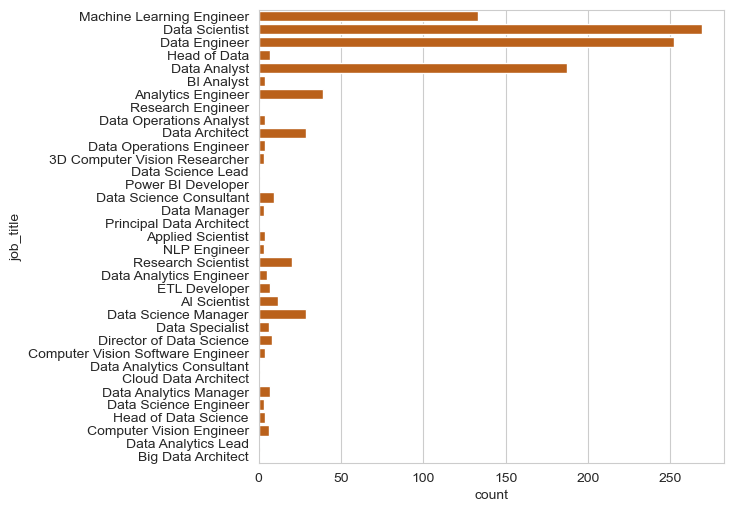

In [97]:
#Displaying the various job title_name entries 
sns.set_style('whitegrid')
plt.figure(figsize=[6,6], dpi=100)

default_color = sns.color_palette()[2]
sns.countplot(color=default_color, y=salaries_clean['job_title']) # sns.countplot(y = 'job_title', data = salaries_clean)
plt.show()

In [98]:
# Displaying how many unique values contained in salaries_df['job_title']
print(salaries_clean['job_title'].unique())
print(salaries_clean['job_title'].nunique())

['Machine Learning Engineer' 'Data Scientist' 'Data Engineer'
 'Head of Data' 'Data Analyst' 'BI Analyst' 'Analytics Engineer'
 'Research Engineer' 'Data Operations Analyst' 'Data Architect'
 'Data Operations Engineer' '3D Computer Vision Researcher'
 'Data Science Lead' 'Power BI Developer' 'Data Science Consultant'
 'Data Manager' 'Principal Data Architect' 'Applied Scientist'
 'NLP Engineer' 'Research Scientist' 'Data Analytics Engineer'
 'ETL Developer' 'AI Scientist' 'Data Science Manager' 'Data Specialist'
 'Director of Data Science' 'Computer Vision Software Engineer'
 'Data Analytics Consultant' 'Cloud Data Architect'
 'Data Analytics Manager' 'Data Science Engineer' 'Head of Data Science'
 'Computer Vision Engineer' 'Data Analytics Lead' 'Big Data Architect']
35


> Apparently, from our dataset (salary_clean), we can see that we now have 35 unique values in the salaries_clean['job_title'] as against 64 unique values in the salaries_df['job_title']

**Drop salary column as only salary_in_usd column would be used in our analysis for uniformity**

In [99]:
# Use drop function to drop unwanted salary column
salaries_clean.drop(columns=['salary', 'salary_currency'],axis=1, inplace=True)

# Confirm if it has been dropped
print(salaries_clean.columns)

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary_in_usd', 'employee_residence', 'remote_ratio',
       'company_location', 'company_size'],
      dtype='object')


In [100]:
# The new dimention of the dataset is = non duplicates and removed salaries_clean['salary']
print(salaries_clean.shape)

(1069, 9)


In [101]:
# Now let's save the non-duplicates into another file as a cleaned data
salaries_clean.to_csv('cleaned_salaries_usable.csv', index=False)

> We assessed, cleaned and saved a csv copy of the salaries_clean.
> This copy will be used for our visualizations.

##### Univariate Exploration

In [102]:
# Read in the cleaned csv file
csv_cleaned = pd.read_csv('cleaned_salaries_usable.csv')

csv_cleaned.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2022,MI,FT,Machine Learning Engineer,130000,US,0,US,M
1,2022,MI,FT,Machine Learning Engineer,90000,US,0,US,M
2,2022,MI,FT,Data Scientist,120000,US,100,US,M
3,2022,MI,FT,Data Scientist,100000,US,100,US,M
4,2022,MI,FT,Data Scientist,85000,US,100,US,M


**Question: What is the distribution of salaries?**
- We will start with our main variabble of interest; salary. Recall, we removed salries_clean['salary'] in order to work only with salaries in US dollar.

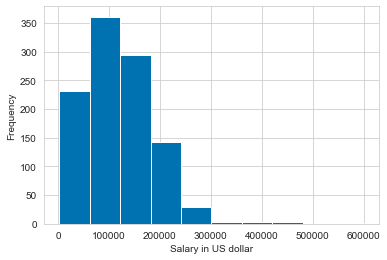

In [103]:
# Distribution of salaries amongst workers
plt.hist(x=csv_cleaned['salary_in_usd']) # plt.hist(data=csv_cleaned, x='salary_in_usd')
plt.xlabel('Salary in US dollar')
plt.ylabel('Frequency')
plt.show()

Text(0, 0.5, 'Frequency')

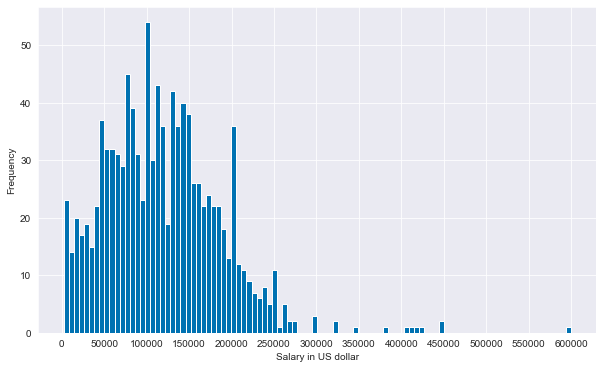

In [104]:
# Distribution with more bins
# plt.style.use('seaborn-colorblind')
sns.set_style('darkgrid')
plt.figure(figsize = [10, 6])
xticks = [0, 50000, 100000, 150000, 200000, 250000, 300000, 350000, 400000, 450000, 500000, 550000, 600000]
plt.hist(data=salaries_clean, x='salary_in_usd', bins = 100)
plt.xticks(xticks)
plt.xlabel('Salary in US dollar')
plt.ylabel('Frequency')

**Observation**: As we could predict, salary has a right-skewed distribution. When the number of bins are increased, the distribution is made up of peaks with the highest around 100000 dollars and steep jumps. The discontinuity above 275000 dollars on the graph emphasizes the gap or difference between top salaries and others in the data science industry.

Let's have a closer look at these top salaries which create discontinuity in the distribution.

In [105]:
# # collect rows with salaries on the right of the graph
discontinous_salaries = csv_cleaned[csv_cleaned['salary_in_usd'] > 275000]
print(discontinous_salaries.shape)
discontinous_salaries.sort_values(by='salary_in_usd', ascending=False)

(15, 9)


,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
1016,2021,EX,FT,Data Engineer,600000,US,100,US,L
832,2020,MI,FT,Research Scientist,450000,US,0,US,M
889,2021,MI,FT,Data Analyst,450000,US,100,US,L
1061,2021,MI,FT,Machine Learning Engineer,423000,US,50,US,L
987,2021,EX,CT,Data Scientist,416000,US,100,US,S
1064,2020,SE,FT,Data Scientist,412000,US,100,US,L
773,2022,SE,FT,Data Analytics Lead,405000,US,100,US,L
778,2022,SE,FT,Data Scientist,380000,US,100,US,L
112,2022,SE,FT,Data Architect,345600,US,0,US,M
1010,2020,EX,FT,Director of Data Science,325000,US,100,US,L


**Question**: What is the distribution of employee's experience, type of employment, company size and work year?

All two (2) variables are qualitative, ordinal values. We will use bar chart to visualize their distribution.

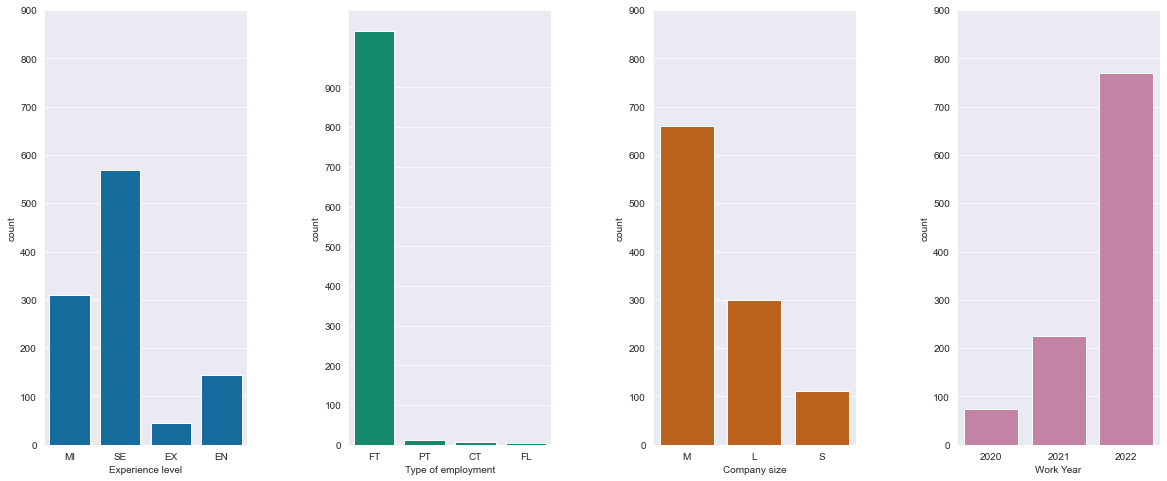

In [106]:

fig, ax = plt.subplots(ncols=4, figsize = [20,8])
yticks = [0, 100, 200, 300, 400, 500, 600, 700, 800, 900]
default_color = sns.color_palette()
sns.countplot(x = csv_cleaned['experience_level'], color = default_color[0], ax = ax[0]).set(xlabel='Experience level')
ax[0].set_yticks(yticks)
sns.countplot(x = csv_cleaned['employment_type'], color = default_color[1], ax = ax[1]).set(xlabel='Type of employment')
ax[1].set_yticks(yticks)
sns.countplot(x = csv_cleaned['company_size'], color = default_color[2], ax = ax[2]).set(xlabel='Company size')
ax[2].set_yticks(yticks)
sns.countplot(x = csv_cleaned['work_year'], color = default_color[3], ax = ax[3]).set(xlabel='Work Year')
ax[3].set_yticks(yticks)
plt.subplots_adjust(wspace=0.5)
plt.show()

**Observation**: The dataset contains mostly employees with senior-level/expert experience level. Almost all the employees have a full time job. Most employees work in a medium-size company. The majority of the salaries were paid on 2022.

**Question**: What is the distribution of Job title?

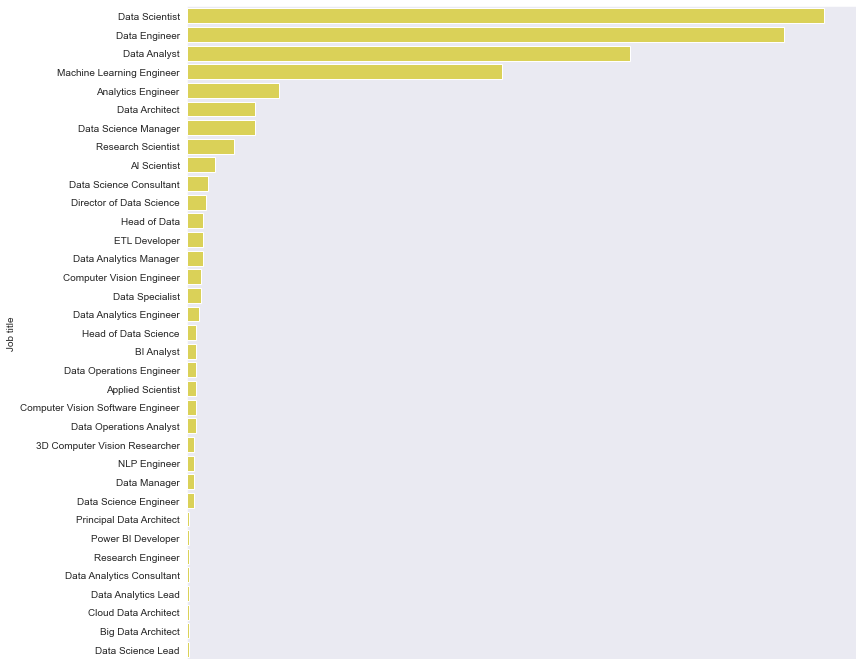

{'Data Scientist': 269, 'Data Engineer': 252, 'Data Analyst': 187, 'Machine Learning Engineer': 133, 'Analytics Engineer': 39, 'Data Architect': 29, 'Data Science Manager': 29, 'Research Scientist': 20, 'AI Scientist': 12, 'Data Science Consultant': 9, 'Director of Data Science': 8, 'Head of Data': 7, 'ETL Developer': 7, 'Data Analytics Manager': 7, 'Computer Vision Engineer': 6, 'Data Specialist': 6, 'Data Analytics Engineer': 5, 'Head of Data Science': 4, 'BI Analyst': 4, 'Data Operations Engineer': 4, 'Applied Scientist': 4, 'Computer Vision Software Engineer': 4, 'Data Operations Analyst': 4, '3D Computer Vision Researcher': 3, 'NLP Engineer': 3, 'Data Manager': 3, 'Data Science Engineer': 3, 'Principal Data Architect': 1, 'Power BI Developer': 1, 'Research Engineer': 1, 'Data Analytics Consultant': 1, 'Data Analytics Lead': 1, 'Cloud Data Architect': 1, 'Big Data Architect': 1, 'Data Science Lead': 1}


In [115]:
plt.figure(figsize=[12,12])
ax_job = sns.countplot(color=default_color[4], y=csv_cleaned['job_title'], order=csv_cleaned['job_title'].value_counts().index)
ax_job.axes.get_xaxis().set_visible(False)
abs_values = csv_cleaned['job_title'].value_counts()
plt.ylabel('Job title')
plt.show()
print(dict(abs_values))

**Observation**: The top five roles in descending order are:

1. Data Scientist - 269
2. Data Engineer - 252
3. Data Analyst - 187
4. Machine Learning Engineer - 133
5. Analytics Engineer - 39

Distribution of the other variables (company location, employee residence and remote ration)

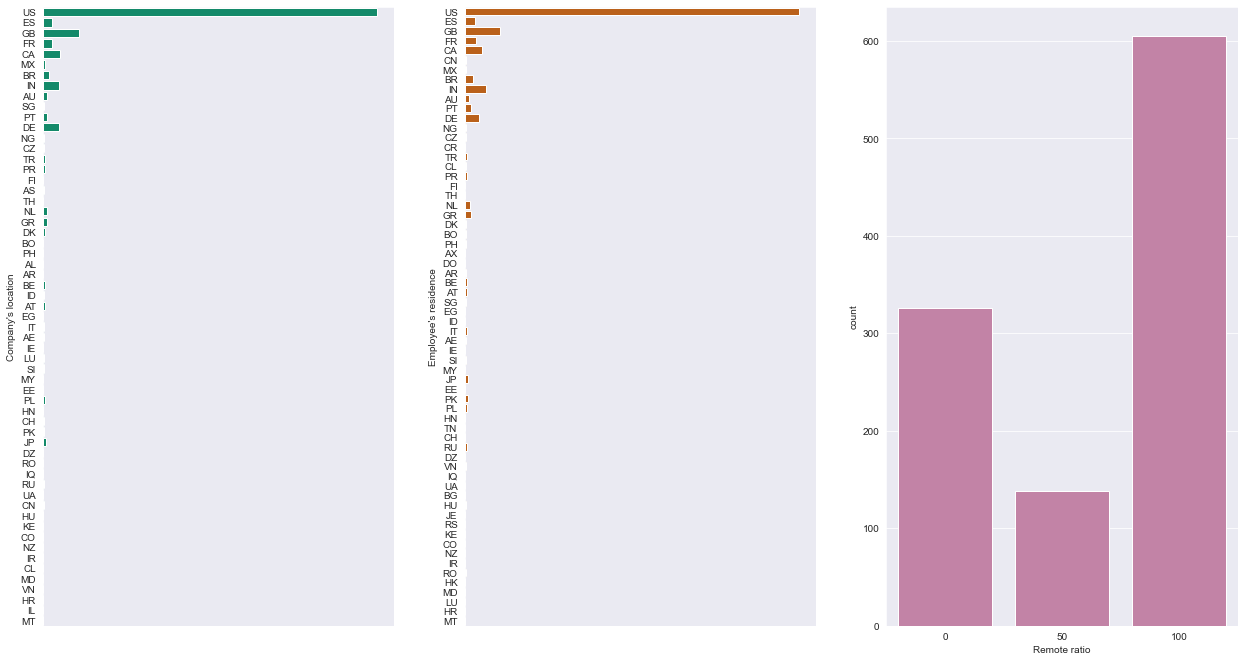

In [122]:
fig, ax = plt.subplots(ncols=3, figsize = [8,8])
default_color = sns.color_palette()
sns.countplot(data = csv_cleaned, y = 'company_location', color = default_color[1], ax = ax[0]).set(ylabel="Company's location")
ax[0].axes.get_xaxis().set_visible(False)

sns.countplot(data = csv_cleaned, y = 'employee_residence', color = default_color[2], ax = ax[1]).set(
    ylabel="Employee's residence")
ax[1].axes.get_xaxis().set_visible(False)
sns.countplot(data = csv_cleaned, x = 'remote_ratio', color = default_color[3], ax = ax[2]).set(xlabel='Remote ratio')
plt.subplots_adjust(right=2.2, top=1.2)
plt.show()

**Observation**: Companies and employees have the same top five countries: USA, Great Britain, India, Canada and Germany. Most of the jobs are remote

**Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?**

> The salary variable has a right-skewed distribution. Salaries concentrate on the low end of the graph as there are more jobs with low wages than higher wages. After increasing the number of bins, the distribution is made up of peaks with the highest around 100000 dollars and steep jumps. The discontinuity above 285000 dollars on the graph emphasizes the gap or difference between top salaries and others in the data science industry. We were concerned about discontinuous points on the graph, but after a deeper look, we concluded that they were correct.

**Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?**

> All features under investigation had usual distributions. We changed the data type of some features for data quality reason and make sure only desired operations can be performed on the data. We changed experience level, company size and remote ratio to ordered-category variables and employment type to an unordered category variable. We dropped two columns which we never needed; salary and salary currency. With this we made use of a universal salary conversion in USD. We also tried our best to join the job_titles to reduce number of unique values.

##### Bivariate Exploration

In this section, we investigate relationships between pairs of variables we used in the previous section.